In [16]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import random
import matplotlib.pyplot as plt
from sklearn import tree

In [17]:
df=pd.read_csv("breast-cancer-wisconsin.data",header=None)

In [18]:
df=df.drop(df.columns[[0]],axis=1)
df=df[pd.to_numeric(df[6], errors='coerce').notnull()]

In [19]:
X=df.drop(df.columns[[9]],axis=1)
Y=df[10]

In [20]:
m_depth=[2,4,6,8]
ms_leap=[5,10,20]
crit=["gini","entropy"]

# problem1 find all combinations results and fit the model and plot the tree 

In [21]:
accur=[]
com_max=0
x_train, x_test, y_train, y_test=train_test_split(X,Y,stratify=Y, random_state=2022,test_size=0.2)
for i in range(len(m_depth)):
    for j in range(len(ms_leap)):
        for z in range(len(crit)):
            
            hyper_clf=DecisionTreeClassifier(max_depth=m_depth[i],min_samples_leaf=ms_leap[j],criterion=crit[z])
            hyper_clf.fit(x_train,y_train)
            resul_predic=hyper_clf.predict(x_test)
            resul=accuracy_score(y_test,resul_predic)
            accur.append(resul)
            print("{0}, {1:2}, {2:10},{3:20}".format(m_depth[i],ms_leap[j],crit[z],resul))
            if com_max<=resul:
                com_max=resul
                depth_max=i
                leap_max=j
                crit_max=z
            else:
                pass

2,  5, gini      ,  0.9562043795620438
2,  5, entropy   ,  0.9635036496350365
2, 10, gini      ,  0.9562043795620438
2, 10, entropy   ,  0.9635036496350365
2, 20, gini      ,  0.9562043795620438
2, 20, entropy   ,  0.9708029197080292
4,  5, gini      ,  0.9781021897810219
4,  5, entropy   ,  0.9708029197080292
4, 10, gini      ,  0.9854014598540146
4, 10, entropy   ,  0.9635036496350365
4, 20, gini      ,  0.9854014598540146
4, 20, entropy   ,  0.9708029197080292
6,  5, gini      ,  0.9781021897810219
6,  5, entropy   ,  0.9708029197080292
6, 10, gini      ,  0.9854014598540146
6, 10, entropy   ,  0.9635036496350365
6, 20, gini      ,  0.9854014598540146
6, 20, entropy   ,  0.9708029197080292
8,  5, gini      ,  0.9781021897810219
8,  5, entropy   ,  0.9708029197080292
8, 10, gini      ,  0.9854014598540146
8, 10, entropy   ,  0.9635036496350365
8, 20, gini      ,  0.9854014598540146
8, 20, entropy   ,  0.9708029197080292


In [22]:
print("When optimal hyperparameter is given as",m_depth[depth_max],",",ms_leap[leap_max],",",crit[crit_max],", the accuracy is a ",com_max)

When optimal hyperparameter is given as 8 , 20 , gini , the accuracy is a  0.9854014598540146


[Text(181.35000000000002, 190.26, 'X[1] <= 3.5\ngini = 0.455\nsamples = 546\nvalue = [355, 191]'),
 Text(111.60000000000001, 135.9, 'X[5] <= 2.5\ngini = 0.152\nsamples = 375\nvalue = [344, 31]'),
 Text(55.800000000000004, 81.53999999999999, 'X[4] <= 2.5\ngini = 0.012\nsamples = 325\nvalue = [323, 2]'),
 Text(27.900000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 298\nvalue = [298, 0]'),
 Text(83.7, 27.180000000000007, 'gini = 0.137\nsamples = 27\nvalue = [25, 2]'),
 Text(167.4, 81.53999999999999, 'X[2] <= 2.5\ngini = 0.487\nsamples = 50\nvalue = [21, 29]'),
 Text(139.5, 27.180000000000007, 'gini = 0.365\nsamples = 25\nvalue = [19, 6]'),
 Text(195.3, 27.180000000000007, 'gini = 0.147\nsamples = 25\nvalue = [2, 23]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 4.5\ngini = 0.12\nsamples = 171\nvalue = [11, 160]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.353\nsamples = 35\nvalue = [8, 27]'),
 Text(279.0, 81.53999999999999, 'X[6] <= 4.5\ngini = 0.043\nsamples = 136\nva

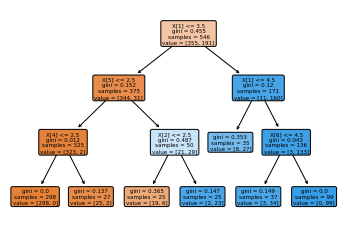

In [23]:
optimal_hyper_clf=DecisionTreeClassifier(max_depth=m_depth[depth_max],min_samples_leaf=ms_leap[leap_max],criterion=crit[crit_max])
optimal_hyper_clf.fit(x_train,y_train)
opt_predic=optimal_hyper_clf.predict(x_test)
tree_test=accuracy_score(y_test, opt_predic)
tree.plot_tree(optimal_hyper_clf,impurity=True, filled=True,
               rounded=True)

# problem2

In [24]:
df1=pd.read_csv("50_Startups.csv")

In [25]:
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [26]:
X1=df1.drop(["Profit","State"],axis=1)
Y1=df1["Profit"]

In [27]:
dummy_state=pd.get_dummies(df1["State"])

In [28]:
dummy_state.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [29]:
dummy_state.drop(columns='New York', inplace=True)

In [30]:
total=pd.concat([X1,dummy_state],axis=1)

In [31]:
total.head()

,R&D Spend,Administration,Marketing Spend,California,Florida
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1


In [32]:
total['intercept']=1
total.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,intercept
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,1
2,153441.51,101145.55,407934.54,0,1,1
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,1


In [33]:
first_column=total.pop('intercept')
total.insert(0,'intercept',first_column)
total.head()

,intercept,R&D Spend,Administration,Marketing Spend,California,Florida
0,1,165349.20,136897.80,471784.10,0,0
1,1,162597.70,151377.59,443898.53,1,0
2,1,153441.51,101145.55,407934.54,0,1
3,1,144372.41,118671.85,383199.62,0,0
4,1,142107.34,91391.77,366168.42,0,1


In [34]:
x1_train, x1_test, y1_train, y1_test=train_test_split(total,Y1, random_state=2022,test_size=0.2)

In [35]:
array_x1_train=np.array(x1_train)
array_x1_test=np.array(x1_test)
array_y1_train=np.array(y1_train)
array_y1_test=np.array(y1_test)

In [36]:
array_x1_train_trans=array_x1_train.T

In [37]:
middle_cal=np.linalg.pinv(np.matmul(array_x1_train_trans,array_x1_train))

In [38]:
middle_cal1=np.matmul(middle_cal,array_x1_train_trans)

In [39]:
coefficient=np.matmul(middle_cal1,array_y1_train)

# number2. coefficient

In [40]:
print(coefficient)

[ 5.12702828e+04  8.11987369e-01 -3.26380848e-02  1.40344372e-02
  4.68145843e+03  2.69837268e+03]


In [41]:
coefficient.shape

(6,)

In [42]:
comp_y=np.matmul(array_x1_test,coefficient)

In [43]:
MSE=np.square(np.subtract(comp_y,array_y1_test)).mean()

In [44]:
print(comp_y)

[ 52767.59257427  68144.13169881  60201.92753167 170003.62532335
 156831.27144208 162245.93897475  88741.62475194  74085.54482308
 159564.6958025   50021.62328736]


In [45]:
print(array_y1_test)

[ 14681.4   81229.06  69758.98 182901.99 149759.96 156122.51  96479.51
  71498.49 155752.6   35673.41]


In [46]:
print(MSE)

225394932.43020135
